In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D,GaussianNoise,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2.10.1


In [2]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=3072)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
test_set="D:\Cancer_Data_Set\All_cancer\\test"
train_set="D:\Cancer_Data_Set\All_cancer\\train"

In [4]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
test_datagen= ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_set,
    target_size = (224,224),
    batch_size = 8,
    class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(
    test_set,
    target_size = (224,224),
    batch_size = 8,
    shuffle=True,
    class_mode = 'categorical')

Found 39916 images belonging to 8 classes.
Found 4761 images belonging to 8 classes.


In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [7]:
es= EarlyStopping(monitor="accuracy",min_delta=0.01,patience=8,verbose=1,mode='auto')
mc=ModelCheckpoint(monitor="accuracy",filepath="D:\Cancer_Data_Set\All_cancer\\genericmodel.h5",verbose=1,save_best_only=True,mode='auto')
cd=[es,mc]

In [8]:
import tensorflow as tf
base_model = tf.keras.applications.EfficientNetB2(weights='imagenet', input_shape=(224,224,3), include_top=False)
# base_model = tf.keras.applications.resnet50.ResNet50(weights='imagenet', input_shape=(224,224,3), include_top=False)
model = Sequential()
model.add(base_model)
model.add(GaussianNoise(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Dropout(0.25))
model.add(Dense(8, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 gaussian_noise (GaussianNoi  (None, 7, 7, 1408)       0         
 se)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1408)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               360704    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                        

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy','Precision','Recall'])

In [10]:
hs=model.fit(
    train_generator,
    epochs=20,
    steps_per_epoch=998,
    verbose=1,
    validation_data=test_generator,
    callbacks=cd
    )

Epoch 1/20
998/998 [==============================] - ETA: 0s - loss: 0.7121 - accuracy: 0.7407 - precision: 0.7590 - recall: 0.7166
Epoch 1: accuracy improved from -inf to 0.74073, saving model to D:\Cancer_Data_Set\All_cancer\genericmodel.h5
998/998 [==============================] - 756s 737ms/step - loss: 0.7121 - accuracy: 0.7407 - precision: 0.7590 - recall: 0.7166 - val_loss: 0.7374 - val_accuracy: 0.7954 - val_precision: 0.7980 - val_recall: 0.7893
Epoch 2/20
998/998 [==============================] - ETA: 0s - loss: 0.4858 - accuracy: 0.8158 - precision: 0.8266 - recall: 0.8030
Epoch 2: accuracy improved from 0.74073 to 0.81576, saving model to D:\Cancer_Data_Set\All_cancer\genericmodel.h5
998/998 [==============================] - 1146s 1s/step - loss: 0.4858 - accuracy: 0.8158 - precision: 0.8266 - recall: 0.8030 - val_loss: 0.3708 - val_accuracy: 0.8652 - val_precision: 0.8663 - val_recall: 0.8643
Epoch 3/20
998/998 [==============================] - ETA: 0s - loss: 0.4178 

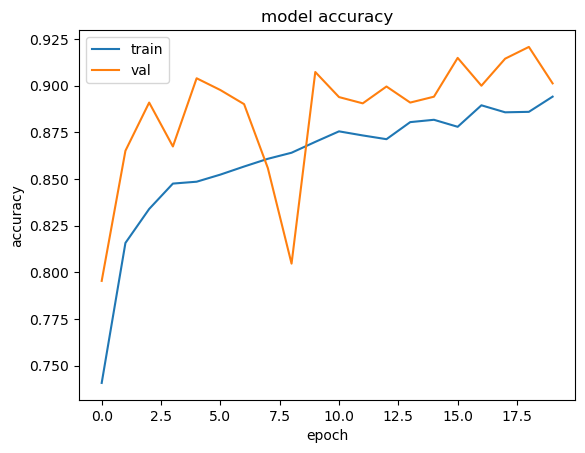

In [11]:
from matplotlib import pyplot as plt
plt.plot(hs.history['accuracy'])
plt.plot(hs.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from tensorflow import keras
model = keras.models.load_model('D:\Phase II Project Work\Generic Model\genericmodel.h5')

1/1 [==============================] - 0s 47ms/step
The suspected result is Brain Tumor


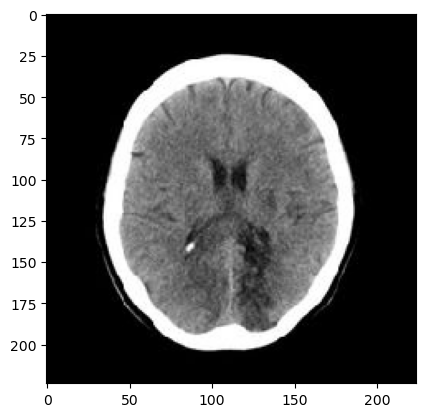

In [16]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
path="D:\\Phase II Project Work\\Cancer_Data_Set\\All_cancer\\test\\"
pathss=path+"7\\Te-no_0012.jpg"
img = image.load_img(pathss,target_size=(224,224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
a=int(np.argmax(ypred,-1))
res=["No cancer","Breast cancer","Skin cancer","Lung cancer","Brain Tumor"]
if(a%2==0):
    op=res[0]
else:
    op=res[a-((a-1)//2)]   
plt.imshow(img)
print("The suspected result is "+str(op))  